Code for COMP 551 Mini Project 1! Start off with importing necessary functions

In [4]:
# necessary imports 
import pandas as pd
import numpy as np
import seaborn as sns

# imports for models : ( source Colab Lecture Code )
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

# import the zscore function from scipi

from scipy.stats import zscore

# **TASK 1.1** - Importing  and Understanding the Data




## Importing the Data

The pandas library allows you to import xlsx data directly into python, using the read_excel() function: https://datatofish.com/read_excel/. You can provide it either with a file name or website link. I preffered the method of downloading the file locally and then getting the data from the file. This works more regularly, because I also ran into an issue where the link I created to a file on github expired. 

In [5]:
# Method using absolute link
# energyData = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
# bankData = pd.read_csv('https://raw.githubusercontent.com/sjavaheri/COMP551mp1/master/bankData.txt?token=GHSAT0AAAAAAB6AXE3KOV56RWCQT3YKCSFQY6W6CEA')


We can also directly load the files locally into the environement with curl. The bankData set is a rar file that has to be decompressed with a command as well. The ! at the start of the line is a way to write command line prompts 

The commented lines only need to be run once to download the files ( I think )


In [6]:
# Download the files to the local storage on Colab
!curl -o energyData.xlsx 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
!curl -o bankData.rar 'https://archive.ics.uci.edu/ml/machine-learning-databases/00281/Qualitative_Bankruptcy%20(250%20instances).rar'
!apt-get install unrar
!unrar e bankData.rar

# Creating the pandas dataframes objects 
energyData = pd.read_excel("energyData.xlsx")
bankData = pd.read_csv ("Qualitative_Bankruptcy.data.txt")

print("Bank Data:")
print(bankData)
print ("Energy Data:")
print(energyData)




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 76189  100 76189    0     0   184k      0 --:--:-- --:--:-- --:--:--  183k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3610  100  3610    0     0  17609      0 --:--:-- --:--:-- --:--:-- 17609
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.6.6-2build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from bankData.rar

Extracting  Qualitative_Bankruptcy.arff                               

## Analysis with Pandas

To better understand the datasets, we can look at information about the dataframes:


In [7]:
print("Energy Data Information: ")
energyData.info()
print ("Bank Data Information:")
bankData.info()

# This prooves that there are no null entires in our dataset, or entries of the wrong type


Energy Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
Bank Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P       249 non-null    object
 1   P.1     249 non-null    object
 2   A       249 non-null    object
 3   A.1     249 non-null    object
 4   A.2     249 non-null    ob

Seeing that the data looks like it doesn't need any cleaning, we can look at key statistics within the data. Key statistics for the energyData are: 

In [8]:
# describe the non normalized data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
energyData.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.76,671.71,318.50,176.60,5.25,3.50,0.23,2.81,22.31,24.59
std,0.11,88.09,43.63,45.17,1.75,1.12,0.13,1.55,10.09,9.51
min,0.62,514.50,245.00,110.25,3.50,2.00,0.00,0.00,6.01,10.90
25%,0.68,606.38,294.00,140.88,3.50,2.75,0.10,1.75,12.99,15.62
50%,0.75,673.75,318.50,183.75,5.25,3.50,0.25,3.00,18.95,22.08
75%,0.83,741.12,343.00,220.50,7.00,4.25,0.40,4.00,31.67,33.13
max,0.98,808.50,416.50,220.50,7.00,5.00,0.40,5.00,43.10,48.03


Key statistics for the Bank Data are: 


In [9]:
# bank data description 
bankData.describe()

,P,P.1,A,A.1,A.2,P.2,NB
count,249,249,249,249,249,249,249
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,142


We can also see the number of unique entries into the energyData collumns: 


In [10]:

energyData.nunique()

# X5 has two values, 3.5 and 7.0, with a 50% split between these values

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    587
Y2    636
dtype: int64

We can do the same thing for the bankData

In [11]:
bankData.nunique()

P      3
P.1    3
A      3
A.1    3
A.2    3
P.2    3
NB     2
dtype: int64

## Visualizations of Data 

We can also find different ways of visualizing the data. We can plot a correlation matrix to see how the features are interrelated. Can only work with numeric data - perhaps have to explore using One Hot Encoding to make the bank data 'numeric'

Text(0.5, 1.0, 'Energy Data Correlation Matrix')

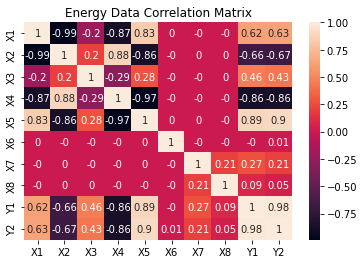

In [12]:
# calculate the energy correlation matrix
energyCor = energyData.corr()

# print (energyCor) - this is hard to follow. Use seaborn to visualize instead

# round the values in the matrix to 2 decimal places
energyCor = energyCor.round(decimals=2)

# create the heatmap
sns.heatmap(energyCor, annot=True)
plt.title("Energy Data Correlation Matrix")

We can also try and find the most important two features in the data, so that we can create scatter plots and other visualizations to better understand these two key features. 

We can do this by calculating the Z score of each variable. This measures how far away that data is on average from the mean, measured in terms of the number of standard deviations. Data with higher Z scores is likely to indicate data that is most likely to affect predictions in a model. 

In [13]:
# apply the zscore function 
energyZscore = energyData.apply(zscore)

# make the zscore values absolute
energyZabsolute = abs(energyZscore)

# sort the features based on Z score
energyZabsolute = energyZabsolute.mean().sort_values(ascending=False)

print(energyZabsolute)



X5   1.00
X4   0.97
Y1   0.91
Y2   0.90
X6   0.89
X8   0.86
X2   0.86
X7   0.85
X1   0.83
X3   0.75
dtype: float64


Now that we know that X5 and X4 are the most important features in the data set, we can plot them against eachother. However, we see that it seems most features are pretty similar to eachother and they might all be important

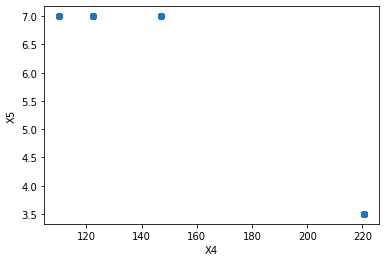

In [14]:
# set the x and y values as the two most important features
# we concluded that X5 has two possible values with a 50% split, but here it shows
# that when X5
x = energyData['X4']
y = energyData['X5']

# plot X4 vs. X5
plt.scatter (x,y)

# label the plot
plt.xlabel('X4')
plt.ylabel('X5')

# show the plot
plt.show()


Do the same thing for the next two highest variables: 

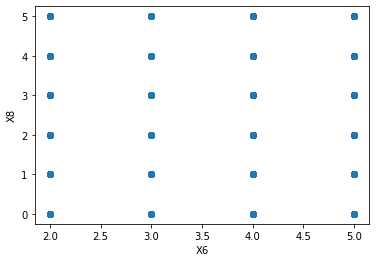

In [15]:
# set the x and y values as the two most important features
x = energyData['X6']
y = energyData['X8']

# plot X6 vs. X8
plt.scatter (x,y)

# label the plot
plt.xlabel('X6')
plt.ylabel('X8')

# show the plot
plt.show()


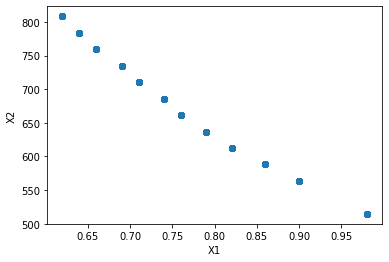

In [16]:
# Plotting X1 vs. X2 to show their correlation is -0.99 - and that we can eliminate X2
x = energyData['X1']
y = energyData['X2']

# plot X1 vs. X2
plt.scatter (x,y)

# label the plot
plt.xlabel('X1')
plt.ylabel('X2')

# show the plot
plt.show()

# **TASK 1.2** - Normalizing and Feature Selection

After all this analysis, we can see and understand patterns in the data. However, all the data have very different means and standard deviations, which indicates that it would be good to normalize it so that all collumns have a mean of 0 and a standard deviation of 1. We can do this by converting the energy data to a numpy array and using the built in mean and standard deviation formulae to normalize each collumn. We will make two arrays: the features (X1 - X8) and their outputs (Y1 - Y2). We will only normalize the features. In the future, the data can be accessed with the following variables:

`features` a numpy array with X1 - X8 **not** normalized

`nfeatures` a numpy array with X1 - X8 normalized

`bfeatures` a numpy array with X1, X3, X5, X7. Some features were eliminated. X2, X4 were eliminated due to high coorelation with other input features. X6, X8 were eliminated due to no corelation with the output

This is backed up by doing Lasso Regularization, which eliminates all features except X4 and X5 when l = 3. Given X5 has higher weights than X4, we chose to eliminate X4

`outputs` a numpy array with Y1 and Y2

In [17]:
# convert to numpy array 
energyDataNumpy = energyData.values
# index into first 8 collumns
features = energyDataNumpy[:,:-2]
# index into last two collumns
outputs = energyDataNumpy[:,-2:]

nfeatures = (features - features.mean(axis=0)) / features.std(axis=0)

bfeatures = nfeatures[:,[0,2,4,6]]
# print ("Features: ")
# print (features)
# print("\n Normalized Features: ")
# print(nfeatures)
# print ("\n Outputs: ")
# print ( outputs)

# **TASK 2.1** Analytical Linear Regression for Energy Data

## Linear Regression Class
The code for the Linear Regression class was provided in the class notebooks. We added the extra funcitonality using regularization with Lasso Regularization for feature selection. In addition, we used the ADAM algorithm for the gradient descent to give a momentum and adaptive learning rate to the gradient descent function. 

*   `fit`: Fit the data using the closed form solution 
*   `fitGradientDescent`: Fit the data using the gradient descent
*   `fitLasso`: fit using lasso regularization for gradient descent. 
* `fitMiniBatch`: fit using mini batch gradient descent
*   `fitADAM`: Fit the data using the ADAM algorithm
*   `predict`: Assuming the weights were previously calculated, predict output given an input
* `cost` : calculate the cost of predicted values against the actual values. Mean Squared Error is used

Note: The code for **fitLasso** was duplicated from **fit** to sepatate concerns and to keep the code efficient.

All models for linear regression that use gradient descent take in a parameter called an `optimizer`. This is a object or instance of the class `GradientDescent`, which extrapolates the calculation of the gradient to allow us to use different functions for different techniques. 

 An optimizer object has a defined method called run: `optimizer.run(self, gradient_fn, x, y, w)` which takes in: 

* `gradient_fn` a method of computing the gradient
* `x` the x values
* `y` the y values 
* `w` the current weight values



In [18]:
class LinearRegression:
    def __init__(self, add_bias=True, lambdaa=0.1):
        # add bias parameter is intitualized to true
        self.add_bias = add_bias

        # Add a regularization parameter for Lasso Regression
        self.lambdaa = lambdaa
        pass

    # Fit with closed form solution ( Analytical Linear Regression )
    # In this case we do not need to pass in an optimizer, because we are using the closed form solution
    def fit(self, x, y):
        if x.ndim == 1:
            # add a dimension to features
            x = x[:, None]
        N = x.shape[0]
        if self.add_bias:
            # add constant feature of value 1 for w0, to indicate the bias
            x = np.column_stack([x, np.ones(N)])

        # use the closed form solution with matrix notation
        self.w = np.linalg.inv(x.T @ x)@ x.T @ y
        # self.w =( np.matmul(np.matmul( np.linalg.inv(np.matmul(x.transpose(), x)), x.transpose()), y) )
        # note from numpy documenation: this method automatically normalizes the data before it performs the multiplication
        # self.w = np.linalg.lstsq(x, y)
        return self

    # Fit with gradient descent
    # In this case, we pass in an optimizer so that we can use gradient descent
    def fitGradientDescent(self, x, y, optimizer):
        # adjust the dimesions of x and y to become matricies if needed
        if x.ndim == 1:
            x = x[:, None]

        # add bias if it is necessary
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape

        # Gradient function over all data to pass to the optimizer
        # This gradient function uses all of the data points to compute a gradient value
        # X has dimension N * D (768 * 8)
        # Y has dimension  N * a ( 768 * a )
        # w has dimesion D * a ( 8 * a)
        def gradient(x, y, w):
            # yh has dimension ( N * D ) * ( D * a ) = (N * a)
            yh = x @ w

            N, D = x.shape

            # (yh - y) has dimension N * a
            #  grad has dimension (D * N) * (N * a) = D * a
            grad = np.dot(x.T, yh - y) / N
            return grad

        # initial weights for gradient descent. Make sure they have a dimension D * width of y
        row, col = y.shape
        if col == 1: 
          w0 = np.zeros(D)[0:,None]
        else: 
          w0 = np.zeros((D,col))

        # Optimal weights resulting from gradient descent
        self.w = optimizer.run(gradient, x, y, w0)
        return self

    # Fit Lasso Regression with gradient descent
    def fitLasso(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape
        # Gradient function over all data with L1 regularization
        def gradient(x, y, w):
            yh = x @ w
            N, D = x.shape
            grad = 0.5 * np.dot(x.T, yh - y) / N
            # L1 for Lasso (ignoring w0)
            # We use the np.sign function to determine the weights of the regularization factor
            # It returns 1 for +ve numbrers, -1 for -ve, 0 for 0. 
            grad[:D] += self.lambdaa * np.sign(w[:D])
            return grad

        # initial weights - made to be D * columns of y dimensional
        row, col = y.shape
        if col == 1: 
          w0 = np.zeros(D)[0:,None]
        else: 
          w0 = np.zeros((D,col))
        # Optimal weights form gradient descent
        self.w = optimizer.run(gradient, x, y, w0)
        return self

    # Fit with gradient descent
    def fitADAM(self, x, y, optimizer, batch_size):
        if x.ndim == 1:
            x = x[:, None]
        if y.ndim == 1:
            y = y[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        # Optimal weights form gradient descent with Adam
        # No need to pass a gradient function to the adam method
        self.w = optimizer.runADAM(x, y, batch_size)
        return self

    # Fit with mini-batch gradient descent
    def fitMiniBatch(self, x, y, optimizer, batch_size):
        if x.ndim == 1:
            x = x[:, None]
        if y.ndim == 1:
            y = y[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        # Optimal weights form gradient descent with miniBatch
        self.w = optimizer.runMiniBatch(x, y, batch_size)
        return self

    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(N)])
        # predictions are a result of a matrix multiplication between x and the weight vector
        yh = x @ self.w
        return yh

    def cost(self, yh, y):
        #yh = self.predict(x)
        return np.mean((yh - y) ** 2)
        # return 0.5 * np.mean((yh - y) ** 2)



## Gradient Descent Class
The code for the Gradient Descent class was provided in the class notebooks. We implemented the ADAM and miniBatch gradient descent methods. You can see in the Gradient Descent class that the run method requires an argument to be passed to it, which is a gradient function. This is used to iteratively calculate and adjust the gradient to compute the optimal weight values. 

The Gradient Descent class takes in the arguments: `learning_rate` :  float, `max_iters`: float, `epsilon`: float, and `record_history`: float for all classes, `beta1`: float and `beta2`: float and `epsilon2`: float for ADAM gradient descent.

*   `run`: Perform the Gradient Descent algorithm using a gradient calculation function
*   `runADAM`: Perform the ADAM algorithm to find the optimal weights. It uses minibatch gradient descent to caluclate the gradient. 
* `createMiniBatch` : creates a list of lists of indicies. Each inner list contains batch_size number of random indicies that can be used to get the datapoints required to calculate the gradient
* `runMiniBatch` : uses the create minibatch function to run minibatch gradient descent. 



In [19]:
# GradientDescent is the class that is initialized as the 'optimizer' object
class GradientDescent:
    def __init__(self, learning_rate=0.001, max_iters=1e4, epsilon=1e-8, beta1=0.9, beta2=0.999, record_history=False, epsilon2=1e-8):
        # parameters for gradient descent
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        # parameters for the adam gradient descent
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon2 = epsilon2
        if record_history:
            # record weight history for visualization
            self.w_history = []
        pass
    # run function that is called by optimizer object
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        # while gradient is significantly non zero and there are still more iterations allowed
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            # compute the gradient with function that was passed in
            grad = gradient_fn(x, y, w)
            # adjust weights by stepping in right direction
            w = w - self.learning_rate * grad
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

    # function to cacluate the batch gradient given data, outputs, weights and a minibatch
    def batchGradient(self, x, y, w, minibatch): 
        # xp = # * D
        xp = x[minibatch, :]
        # print("xp: ", xp.shape)
        # yp = # * 1
        yp = y[minibatch, :]
        # print("yp: ", yp.shape)
        # yh = (# * D) * (D * 1)  = # * 1
        yh = xp @ w
        # print("yh: ", yh.shape)
        # Mean gradient of a batch of points
        # grad = (D * #) * (# * 1) = (D * 1)
        grad = np.dot(xp.T, yh - yp) / len(minibatch)
        return grad

    # For Linear Regression with the Adaptive Movement Estimation
    def runADAM(self, x, y, batch_size = 1):
        N, D = x.shape
        grad = np.inf
        t = 1
        m = 0.0  # Momentum initial value
        s = 0.0  # RMSprop initial value
        w = np.ones(x.shape[1])[:,None]  # Initial weights
        epochReached = True
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters and t < x.shape[0]:

            # GRADIENT USING MINIBATCH

            # if epoch has been reached, generate new set of batches of gradient
            if epochReached == True: 
              # minibatches is a list of lists of indicies. Each inner list has batch_size number of random indicies
              minibatches = self.createMiniBatchIndex(N, batch_size)
              epochReached = False
            numberOfMiniBatches = (N//batch_size)
            # access the minibatch at the right index according to which iteration we are at
            minibatch = minibatches[t % numberOfMiniBatches]
            
            # calcualte batch gradient
            grad = self.batchGradient(x,y,w,minibatch)

            # ADAM code
            m = self.beta1 * m + (1 - self.beta1) * grad  # Momentum
            s = self.beta2 * s + (1 - self.beta2) * grad**2  # RMSprop
            m_hat = m / (1 - self.beta1**t)  # Bias correction - prevent bias of m towards 0
            s_hat = s / (1 - self.beta2**t)  # Bias correction - prevent bias of s towards 0
            w = w - self.learning_rate * m_hat / \
                (np.sqrt(s_hat) + self.epsilon2)  # Update weights with adam formula
            if self.record_history:
                self.w_history.append(w)
            t += 1
            # if t is divisible by the number of batches, epoch has been reached
            if t!= 0 and t % numberOfMiniBatches == 0 : 
              epochReached = False
        return w

    # Create mini-batch indices 
    def createMiniBatchIndex(self, N, batchSize):
        miniBatches = []
        index = list(range(N))  # Create a list of indices from 0 to N-1
        np.random.shuffle(index)  # Randomize the order of the indices
        numberOfMiniBatches = N // batchSize  # Number of complete mini batches
        for i in range(numberOfMiniBatches):
            miniBatches.append(index[i * batchSize:(i + 1) * batchSize])
        if N % batchSize != 0:  # If there are remaining data points
            # Add the remaining data points to the last mini batch
            miniBatches.append(index[numberOfMiniBatches * batchSize:])
        return miniBatches

    # Run the mini-batch gradient descent algotithm
    def runMiniBatch(self, x, y, batch_size):
        N, D = x.shape
        grad = np.inf
        t = 0
        w = np.zeros((D, y.shape[1]))  # Initial weights
        # print("w: ", w.shape)
        # running = True
        # initialize epoch reached to True
        epochReached = True
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
          # if epoch has been reached, generate new set of batches of gradient
          if epochReached == True: 
            # minibatches is a list of lists of indicies. Each inner list has batch_size number of random indicies
            minibatches = self.createMiniBatchIndex(N, batch_size)
            epochReached = False
          numberOfMiniBatches = (N//batch_size)
          # access the minibatch at the right index according to which iteration we are at
          minibatch = minibatches[t % numberOfMiniBatches]

          grad = self.batchGradient(x,y,w,minibatch)

        # adjust learning rate according to gradient
          w = w - self.learning_rate * grad
          if self.record_history:
              self.w_history.append(w)
          t += 1
          # if t is divisible by the number of batches, epoch has been reached
          if t!= 0 and t % numberOfMiniBatches == 0 : 
              epochReached = True
        #   if np.linalg.norm(grad) <= self.epsilon or t >= self.max_iters:
        #     running = False
        #     break
        return w

#TASK 3 - Testing

## **Task 3.1 + 2** - Analysis of Analytical Linear Regression 

### Testing Analytical Linear Regression

Since the Linear Regression has a closed form solution, it will provide a benchmark for the different solutions.

It is clear to see that the normalized data has a much lower cost than the non-normalized data, as expected. Sometimes, a "Singular matrix" is thrown when feature selection is not used, due to the presence of highly correlated features in the design matrix. We can eliminate this error by using the data with feature selection


In [20]:
np.random.seed(2)
N, D = nfeatures.shape
model = LinearRegression()

# Computing Non-Normalized Data Performance
# separate the data for training/test
inds = np.random.permutation(N)
n_training = int(N * 0.8)
x_train, y_train = features[inds[:n_training]], outputs[inds[:n_training]]
x_test, y_test = features[inds[n_training:]], outputs[inds[n_training:]]

model.fit(x_train, y_train)

print("Non-normalized Data:")
print("Training Cost: ", model.cost(model.predict(x_train), y_train))
print("Testing Cost: ", model.cost(model.predict(x_test), y_test), "\n")

# Computing performance for normalized data
n_runs = 15
training_costs, test_costs = [], []
# D + 1 to account for bias
# 2 outputs
weights = np.empty((n_runs, D + 1, 2))
x_axis = range(15)

# Populate the costs arrays
for i in range(n_runs):
  inds = np.random.permutation(N)
  n_training = int(N * 0.8)
  # separate the data for training/test
  xn_train, y_train = nfeatures[inds[:n_training]], outputs[inds[:n_training]]
  xn_test, y_test = nfeatures[inds[n_training:]], outputs[inds[n_training:]]
  # Analytical
  model.fit(xn_train, y_train)
  training_costs.append(model.cost(model.predict(xn_train), y_train))
  test_costs.append(model.cost(model.predict(xn_test), y_test))
  weights[i] = model.w

# Raw metrics
training_avg, test_avg = np.mean(training_costs), np.mean(test_costs)
training_std, test_std = np.std(training_costs), np.std(test_costs)
weightsY1_avg = np.mean(weights[:,:,0], axis=0)
weightsY2_avg = np.mean(weights[:,:,1], axis=0)

# Remove outliers
std = 3
training_outliers, test_outliers = [], []

for i, cost in enumerate(training_costs):
  if abs(cost - training_avg) >= std * training_std: 
    training_outliers.append(i)

for i, cost in enumerate(test_costs):
  if abs(cost - test_avg) >= std * test_std: 
    test_outliers.append(i)

training_processed = np.delete(training_costs, training_outliers)
test_processed = np.delete(test_costs, test_outliers)

# Construct Performance Table
df = pd.DataFrame({
    "Training Cost Average": np.mean(training_processed),
    "Training Cost STD": np.std(training_processed),
    "Test Cost Average": np.mean(test_processed),
    "Test Cost STD": np.std(test_processed),
  },
  index = ["Analytical"])

print("\n", df)
print(training_outliers)
print(test_outliers)
#Print weights (average over all simulations, no removing of outliers)
rows = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7','X8', 'Bias']
df = pd.DataFrame({
    "Y1": weightsY1_avg,
    "Y2": weightsY2_avg,
    }, index = rows)
print("\nWeights for the normalized data:\n ", df)



Non-normalized Data:
Training Cost:  1633.688185839819
Testing Cost:  1631.2381124350304 


             Training Cost Average  Training Cost STD  Test Cost Average  \
Analytical                  11.07               2.20              11.38   

            Test Cost STD  
Analytical           2.39  
[5]
[5]

Weights for the normalized data:
           Y1     Y2
X1    -5.63  -6.31
X2   -11.40 -12.91
X3     5.26   5.24
X4     5.65   6.99
X5     7.41   7.58
X6    -0.02   0.15
X7     2.66   1.97
X8     0.32   0.06
Bias  22.32  24.61


### Testing Analytical Linear Regression With Feature Selection

With feature selection, we can drastically reduce the standard deviation of results, and there is no need to eliminate outliers from our data

In [21]:

# Computing performance for normalized data with feature selection
N, D = bfeatures.shape
n_runs = 15
training_costs, test_costs = [], []

model2 = LinearRegression()
# D + 1 to account for bias
# 2 outputs
weights = np.empty((n_runs, D + 1, 2))
x_axis = range(n_runs)

# Populate the costs arrays
for i in range(n_runs):
  inds = np.random.permutation(N)
  n_training = int(N * 0.8)
  # separate the data for training/test
  xn_train, y_train = bfeatures[inds[:n_training]], outputs[inds[:n_training]]
  xn_test, y_test = bfeatures[inds[n_training:]], outputs[inds[n_training:]]
  # Analytical Regresssion
  model2.fit(xn_train, y_train)

  ptrain = model2.predict(xn_train)
  ptest = model2.predict(xn_test)

  training_costs.append(model2.cost(ptrain, y_train))
  test_costs.append(model2.cost(ptest, y_test))
  weights[i] = model2.w


# Raw metrics
training_avg, test_avg = np.mean(training_costs), np.mean(test_costs)
training_std, test_std = np.std(training_costs), np.std(test_costs)
weightsY1_avg = np.mean(weights[:,:,0], axis=0)
weightsY2_avg = np.mean(weights[:,:,1], axis=0)

print("Results with Feature Selection:")

# Construct Performance Table
df = pd.DataFrame({
    "Training Cost Average": np.mean(training_costs),
    "Training Cost STD": np.std(training_costs),
    "Test Cost Average": np.mean(test_costs),
    "Test Cost STD": np.std(test_costs),
  },
  index = ["Analytical"])

print("\n", df)

#Print weights (average over all simulations, no removing of outliers)
rows = ['X1', 'X3', 'X5', 'X7','Bias']
df = pd.DataFrame({
    "Y1": weightsY1_avg,
    "Y2": weightsY2_avg,
    }, index = rows)
print("\nWeights for the normalized data with feature selection:\n ", df)


Results with Feature Selection:

             Training Cost Average  Training Cost STD  Test Cost Average  \
Analytical                   9.57               0.25              10.20   

            Test Cost STD  
Analytical           0.99  

Weights for the normalized data with feature selection:
          Y1    Y2
X1   -1.52 -2.11
X3    1.53  0.81
X5    9.78 10.01
X7    2.71  1.95
Bias 22.31 24.59


###  Lasso Regularization for feature selection

The table below shows the weights for the Lasso Regression. This helps us to justify which features that are highly correlated to eliminate - we eliminate the ones with a lower weight. You can see that all the features we chose to eliminate had their weights go very quickly to 0. 



In [22]:
# np.set_printoptions(precision=2)
lambdas = [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 3]
weightsY1 = []
weightsY2 = []
cols = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "Bias"]
rows = [] # to be populated
optimizer = GradientDescent()

for l in lambdas:
  rows.append(str(l))
  lasso = LinearRegression(lambdaa=l)
  lasso.fitLasso(nfeatures, outputs, optimizer)
  weightsY1.append(lasso.w[:,0])
  weightsY2.append(lasso.w[:,1])

dfY1 = pd.DataFrame(weightsY1, columns = cols, index = rows)
dfY2 = pd.DataFrame(weightsY2, columns = cols, index = rows)

print("Y1 weights:\n", dfY1, "\n")
print("Y2 weights:\n", dfY2)

Y1 weights:
           X1    X2   X3    X4   X5    X6   X7   X8  Bias
0       0.14 -1.16 2.99 -2.57 4.27 -0.03 2.63 0.34 22.16
0.0001  0.14 -1.16 2.99 -2.57 4.27 -0.03 2.63 0.34 22.16
0.001   0.14 -1.16 2.98 -2.57 4.27 -0.02 2.63 0.33 22.16
0.01    0.12 -1.14 2.96 -2.58 4.28 -0.01 2.61 0.32 22.14
0.1    -0.00 -0.96 2.69 -2.69 4.34  0.00 2.46 0.17 21.96
0.5    -0.00 -0.00 1.63 -2.93 4.44 -0.00 1.71 0.00 21.16
1      -0.00 -0.00 0.72 -2.65 4.05 -0.00 0.72 0.00 20.17
2       0.00 -0.00 0.00 -1.79 3.10  0.00 0.00 0.00 18.18
3       0.00 -0.00 0.00 -0.78 2.08  0.00 0.00 0.00 16.20 

Y2 weights:
           X1    X2   X3    X4   X5    X6    X7    X8  Bias
0       0.07 -1.16 2.53 -2.35 4.20  0.13  1.94  0.08 24.42
0.0001  0.07 -1.16 2.53 -2.35 4.20  0.13  1.94  0.08 24.42
0.001   0.07 -1.16 2.53 -2.35 4.20  0.13  1.94  0.08 24.42
0.01    0.05 -1.14 2.50 -2.36 4.20  0.12  1.92  0.06 24.40
0.1    -0.00 -0.94 2.24 -2.45 4.25  0.00  1.76  0.00 24.22
0.5    -0.00  0.00 1.19 -2.68 4.34 -0.00  0.97 -

### Plotting the Most Important Feature for Y1

With Lasso Regression, we have identified that X5 is the most important feature. We can use it to demonstrate that our model is working as expected. 

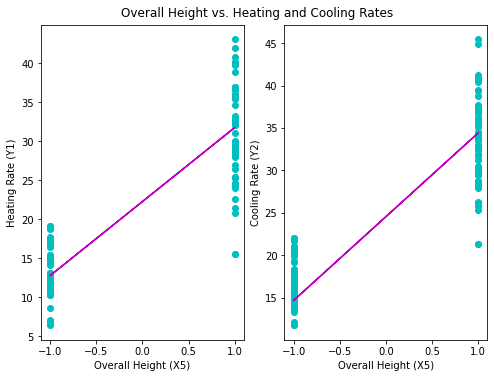

In [23]:
# plot a graph of X5 vs. y = bias + X5 * W5
newModel = LinearRegression()
np.random.seed(19)
N,D = bfeatures.shape
# Computing Non-Normalized Data Performance
# separate the data for training/test
inds = np.random.permutation(N)
n_training = int(N * 0.8)
# separate the data for training/test
xn_train, y_train = bfeatures[inds[:n_training]], outputs[inds[:n_training]]
xn_test, y_test = bfeatures[inds[n_training:]], outputs[inds[n_training:]]

# compute the weights
result = newModel.fit(xn_train,y_train)

# calculate w5 and bias for Y1
w5 = result.w[2][0]
bias = result.w[4][0]
# intializee lists to plot line y1 = w5 * x5 + bias
x = []
y = []
N,D = xn_test.shape
for i in range (N): 
  x.append(xn_test[i][2])
  y.append((xn_test[i][2] * w5 + bias))

# create two plots to show Y1 and Y2 on the same graph
figure, (axis1, axis2) = plt.subplots(1, 2, figsize=(8, 5))
figure.subplots_adjust(top=1)

figure.suptitle("Overall Height vs. Heating and Cooling Rates",y=1.05)
ticks = np.linspace(-1, 1, 5)
axis1.set_xticks(ticks)
axis2.set_xticks(ticks)

# plotting settings for Y1
axis1.plot(x,y,label="y1 = bias + X5 * W5", color='m')
# axis1.set_title("Impact of Overall Height (X5) on Heating Rate (Y1)")
axis1.set_xlabel("Overall Height (X5)")
axis1.set_ylabel("Heating Rate (Y1)")
axis1.scatter(xn_test[:,2:3],y_test[:,0:1],color='c')

# calculate w5 and bias for Y2
w5 = result.w[2][1]
bias = result.w[4][1]

# intializee lists to plot line y2 = w5 * x5 + bias
x = []
y = []
N,D = xn_test.shape
for i in range (N): 
  x.append(xn_test[i][2])
  y.append((xn_test[i][2] * w5 + bias))

# plotting settings for Y2
axis2.plot(x,y,label="y2 = bias + X5 * W5", color='m')
# axis2.set_title("Impact of Overall Height (X5) on Cooling Rate (Y2)")
axis2.set_xlabel("Overall Height (X5)")
axis2.set_ylabel("Cooling Rate (Y2)")
axis2.scatter(xn_test[:,2:3],y_test[:,1:2],color='c')
axis2.set
# plt.tight_layout()
plt.show()


## Task 3.3 - Testing Growing Subsets of the Training Data

The plot shows the training and test performance of the linear regression as function of the training size. Interestingly, training size does not have a major effect on cost, but reduces the variance between the various trials. We used an average between 15 runs to calcualte these results. 

### Plot Training and Test Costs

In [78]:
def plotCosts(training_costs, test_costs, title, xlabel, ylabel):
  # average training costs 
  average_training_costs = np.mean(training_costs, axis=0)
  average_test_costs = np.mean(test_costs, axis=0)
  print()
  # standard deviation of costs
  std_training = np.std(training_costs, axis = 0)
  std_test = np.std(test_costs, axis = 0, ddof=1)

  # calculate the highest value in the two arrays
  max_val = np.amax(np.array([np.amax(average_test_costs), np.amax(average_training_costs)]))
  # plot with errors
  plt.errorbar(x_axis, average_test_costs,std_test, label="test data",color='g')
  plt.errorbar(x_axis, average_training_costs, std_training, label="training data",color ='b')
  # assign plot properties
  plt.title(title)
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend(loc='upper right')
  plt.show()

### Analyse Cost vs. Changing Training Data Size

Based on an average of 15 runs

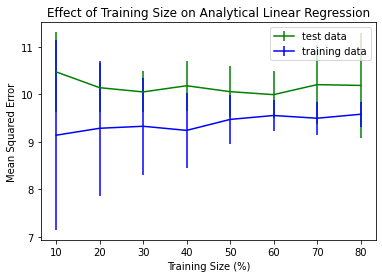

In [79]:
runs = 15
training_samples = 8
training_costs = np.zeros((runs,training_samples))
test_costs = np.zeros((runs,training_samples))
x_axis = [i for i in range(10,90,10)]
optimizer = GradientDescent()
np.random.seed(92)

N,D = bfeatures.shape

for run in range(runs):
  counter = 0
  inds = np.random.permutation(N)
  for i in x_axis:
    
    n_training = int(N * i * 0.01)
    # separate the data for training/test
    xn_train, y_train = bfeatures[inds[:n_training]], outputs[inds[:n_training]]
    xn_test, y_test = bfeatures[inds[n_training:]], outputs[inds[n_training:]]
    # train the model
    model.fit(xn_train, y_train)
    # calculate the costs
     # predict the outcomes for training and test data
    ptrain = model.predict(xn_train)
    ptest = model.predict(xn_test)
    # assign the costs for training and test data
    training_costs[run][counter] = model.cost(ptrain, y_train)
    test_costs[run][counter] = model.cost(ptest, y_test)
    counter += 1

plotCosts(training_costs, test_costs, "Effect of Training Size on Analytical Linear Regression", 'Training Size (%)', 'Mean Squared Error')

## Task 3.4 - Testing Growing Minibatch Size


### Effect on Cost
The plot shows the training and test performance of the linear regression as function of the minibatch size. We can see that the total cost fo the implementation does not change based on the batch size. These results are based on an average of 15 runs


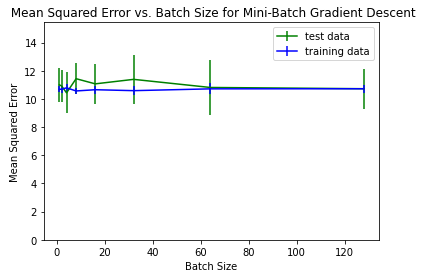

In [26]:
# number of runs and bath sizes
runs = 15
batch_sizes = 8

N,D = bfeatures.shape

# initialize optimizer and numpy arrays
optimizer = GradientDescent()
training_costs = np.zeros((runs,batch_sizes))
test_costs = np.zeros((runs,batch_sizes))
# values for batch sizes
x_axis = [2 ** i for i in range(batch_sizes)]
# training split
n_training = int(N * 0.80)

model = LinearRegression()
np.random.seed(1)

for run in range(runs):
  for i in range (batch_sizes): 
    inds = np.random.permutation(N)
    batch_size = 2 ** i
    # separate the data for training/test
    xn_train, y_train = bfeatures[inds[:n_training]], outputs[inds[:n_training]]
    xn_test, y_test = bfeatures[inds[n_training:]], outputs[inds[n_training:]]
    # train the model
    model.fitMiniBatch(xn_train, y_train, optimizer, batch_size)
    # predict the outcomes for training and test data
    ptrain = model.predict(xn_train)
    ptest = model.predict(xn_test)
    # assign the costs for training and test data
    training_costs[run][i] = model.cost(ptrain, y_train)
    test_costs[run][i] = model.cost(ptest, y_test)

plotCosts(training_costs,test_costs, " Mean Squared Error vs. Batch Size for Mini-Batch Gradient Descent", 'Batch Size', 'Mean Squared Error')

### Effect on Time to Termination

We examine the effect of Minibatch size on the time to termination. Once again, we use an average of 15 runs

[0.24534976 0.25328852 0.26617543 0.27881649 0.30774592 0.43084952
 0.55741216 0.78257294]


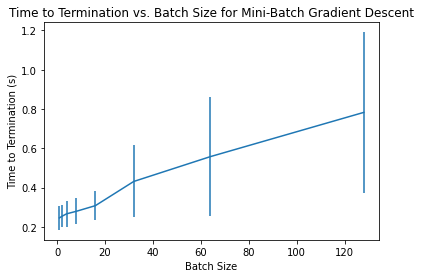

In [27]:
import time as t

# number of runs and bath sizes
runs = 15
batch_sizes = 8

time = np.zeros((runs, batch_sizes))
N,D = bfeatures.shape

# values for batch sizes
x_axis = [2 ** i for i in range(batch_sizes)]
# training split
n_training = int(N * 0.80)

model = LinearRegression()
np.random.seed(1)

for run in range(runs):
  
  for i in range (batch_sizes): 
    start = t.time()
    inds = np.random.permutation(N)
    batch_size = 2 ** i
    # separate the data for training/test
    xn_train, y_train = bfeatures[inds[:n_training]], outputs[inds[:n_training]]
    xn_test, y_test = bfeatures[inds[n_training:]], outputs[inds[n_training:]]
    # train the model
    model.fitMiniBatch(xn_train, y_train, optimizer, batch_size)
    # predict the outcomes for training and test data
    
    # assign the number of iterations it took
    time[run][i] = t.time() - start

# average number of iterations to termination 
average_time = np.mean(time, axis = 0)

# standard deviation of iterations 
std_time = np.std(time, axis = 0)

print (average_time)

# plot with errors
plt.errorbar(x_axis, average_time,std_time)

# assign plot properties
plt.title("Time to Termination vs. Batch Size for Mini-Batch Gradient Descent")
plt.xlabel('Batch Size')
plt.ylabel('Time to Termination (s)')
plt.show()

### Effect on Number of Iterations

To observe the number of iterations until termination with each method, we increase epsilon to have a value of 1 and max iterations to a value of 1e5, so that the gradient descent stops before the max iterations. 

614
[1540.93333333 1883.2        2611.6        2761.         2709.93333333
 2851.53333333 2956.8        3106.73333333]


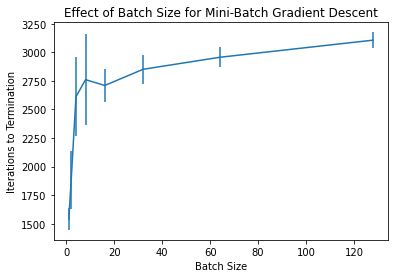

In [28]:
# number of runs and bath sizes
runs = 15
batch_sizes = 8
# initialize optimizer and numpy arrays

iterations = np.zeros((runs, batch_sizes))

N,D = bfeatures.shape

# values for batch sizes
x_axis = [2 ** i for i in range(batch_sizes)]
# training split
n_training = int(N * 0.80)
print(n_training)

model = LinearRegression()
np.random.seed(1)

for run in range(runs):
  
  for i in range (batch_sizes): 
    optimizer = GradientDescent(record_history=True, epsilon= 1, max_iters = 1e5)   
    inds = np.random.permutation(N)
    batch_size = 2 ** i
    # separate the data for training/test
    xn_train, y_train = bfeatures[inds[:n_training]], outputs[inds[:n_training]]
    xn_test, y_test = bfeatures[inds[n_training:]], outputs[inds[n_training:]]
    # train the model
    model.fitMiniBatch(xn_train, y_train, optimizer, batch_size)
    # predict the outcomes for training and test data
    
    # assign the number of iterations it took
    iterations[run][i] = len(optimizer.w_history)



# average number of iterations to termination 
average_iterations = np.mean(iterations, axis = 0)

# standard deviation of iterations 
std_iterations = np.std(iterations, axis = 0)

print (average_iterations)

# plot with errors
plt.errorbar(x_axis, average_iterations,std_iterations)

# assign plot properties
plt.title("Effect of Batch Size for Mini-Batch Gradient Descent")
plt.xlabel('Batch Size')
plt.ylabel('Iterations to Termination')
plt.show()

## Task 3.5 - Testing Multiple learning rates

The plots show the training and test performance of the linear regression with normal gradient descent as function of the learning rate. 

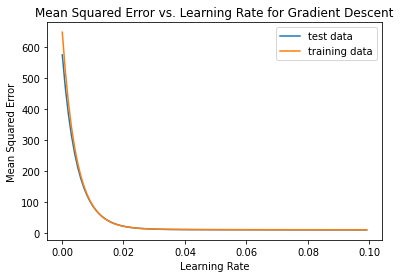

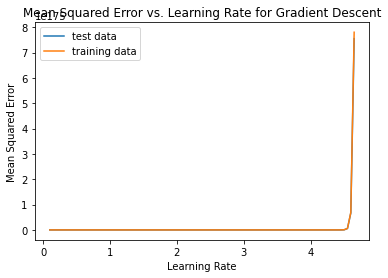

In [29]:
# Helper function to plot the diagram

N,D = bfeatures.shape

def drawMultipleLearningRates(x_axis):
  # Separate test data
  training_costs = []
  test_costs = []
  np.random.seed(0)
  n_training = int(N * 0.8)
  inds = np.random.permutation(N)
  xn_train, y_train = bfeatures[inds[:n_training]], outputs[inds[:n_training]]
  xn_test, y_test = bfeatures[inds[n_training:]], outputs[inds[n_training:]]
  for i in x_axis:
    optimizer = GradientDescent(learning_rate = i, max_iters = 100)
    model.fitGradientDescent(xn_train, y_train, optimizer)
    # calculate the costs
    training_costs.append(model.cost(model.predict(xn_train), y_train))
    test_costs.append(model.cost(model.predict(xn_test), y_test))
  # Plot
  plt.plot(x_axis, test_costs, '-', label='test data')
  plt.plot(x_axis, training_costs, '-', label='training data')
  plt.legend()
  plt.title("Mean Squared Error vs. Learning Rate for Gradient Descent")
  plt.xlabel('Learning Rate')
  plt.ylabel('Mean Squared Error')
  plt.show()
  return

# Learning rates to plot
x1 = np.arange(0.0001, 0.1, 0.001)
x2 = np.arange(0.1, 4.7, 0.05)
drawMultipleLearningRates(x1)
drawMultipleLearningRates(x2)

### With Minibatch Gradient Descent

Shows that the effect of learning rate is very similar for both minibatch gradient descent and normal gradient descent

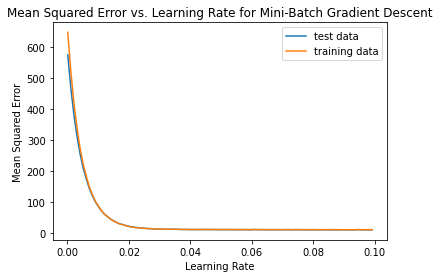

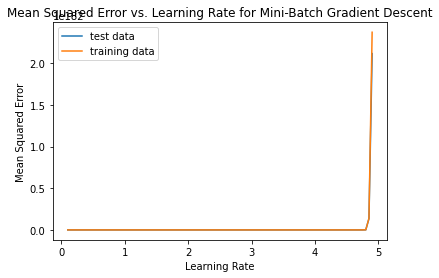

In [30]:
# Helper function to plot the diagram

N,D = bfeatures.shape

def drawMultipleLearningRates(x_axis):
  # Separate test data
  training_costs = []
  test_costs = []
  np.random.seed(0)
  n_training = int(N * 0.8)
  inds = np.random.permutation(N)
  xn_train, y_train = bfeatures[inds[:n_training]], outputs[inds[:n_training]]
  xn_test, y_test = bfeatures[inds[n_training:]], outputs[inds[n_training:]]
  for i in x_axis:
    optimizer = GradientDescent(learning_rate = i, max_iters = 100)
    model.fitMiniBatch(xn_train, y_train, optimizer, 16)
    # calculate the costs
    training_costs.append(model.cost(model.predict(xn_train), y_train))
    test_costs.append(model.cost(model.predict(xn_test), y_test))
  # Plot
  plt.plot(x_axis, test_costs, '-', label='test data')
  plt.plot(x_axis, training_costs, '-', label='training data')
  plt.legend()
  plt.title("Mean Squared Error vs. Learning Rate for Mini-Batch Gradient Descent")
  plt.xlabel('Learning Rate')
  plt.ylabel('Mean Squared Error')
  plt.show()
  return

# Learning rates to plot
x1 = np.arange(0.0001, 0.1, 0.001)
x2 = np.arange(0.1, 4.9, 0.05)
drawMultipleLearningRates(x1)
drawMultipleLearningRates(x2)

### With Adam

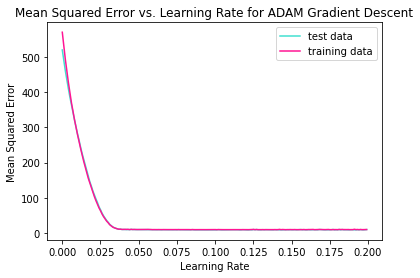

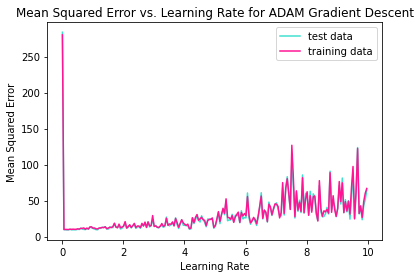

In [61]:
# Helper function to plot the diagram

N,D = bfeatures.shape

def drawMultipleLearningRates(x_axis):
  # Separate test data
  training_costs = []
  test_costs = []
  np.random.seed(0)
  n_training = int(N * 0.8)
  inds = np.random.permutation(N)
  xn_train, y_train = bfeatures[inds[:n_training]], outputs[inds[:n_training]]
  xn_test, y_test = bfeatures[inds[n_training:]], outputs[inds[n_training:]]
  for i in x_axis:
    optimizer = GradientDescent(learning_rate=i, max_iters=1e4, epsilon=1e-8, beta1=0.5, beta2=0.5, record_history=False, epsilon2=1e-8)
    model.fitADAM(xn_train, y_train, optimizer, 16)
    # calculate the costs
    training_costs.append(model.cost(model.predict(xn_train), y_train))
    test_costs.append(model.cost(model.predict(xn_test), y_test))
  # Plot
  plt.plot(x_axis, test_costs, '-', label='test data', color = 'turquoise')
  plt.plot(x_axis, training_costs, '-', label='training data', color = 'deeppink')
  plt.legend()
  plt.title("Mean Squared Error vs. Learning Rate for ADAM Gradient Descent")
  plt.xlabel('Learning Rate')
  plt.ylabel('Mean Squared Error')
  plt.show()
  return

# Learning rates to plot
x1 = np.arange(0.0001, 0.2, 0.001)
x2 = np.arange(0.01, 10, 0.05)
drawMultipleLearningRates(x1)
drawMultipleLearningRates(x2)

## Task 3.6 - Comparing Performances

The table shows the average and standard deviation costs for the different linear regression solution, namely, analytical, mini-batch, fully batch, and Adam. The metrics are calculated over a particular number of simulations with a 80%/20% split of the data.

The Adam model was hyperparameter tuned by train and error and not with a validation set. This is something we could have improved on. 


In [32]:
n_runs = 15
n_models = 4
training_costs, test_costs = np.zeros((n_models, n_runs)), np.zeros((n_models, n_runs))
weights = np.empty((n_models, n_runs, bfeatures.shape[1] + 1, 2))
x_axis = range(100)
batchSize = 32

optimizer = GradientDescent(learning_rate=0.1, max_iters=1e4, epsilon=1e-8, beta1=0.5, beta2=0.5, record_history=False, epsilon2=1e-8)

np.random.seed(0)
# Populate the costs matrices
for i in range(n_runs):
  inds = np.random.permutation(N)
  n_training = int(N * 0.8)
  # separate the data for training/test
  xn_train, y_train = bfeatures[inds[:n_training]], outputs[inds[:n_training]]
  xn_test, y_test = bfeatures[inds[n_training:]], outputs[inds[n_training:]]
  # Analytical
  model.fit(xn_train, y_train)
  training_costs[0, i] = model.cost(model.predict(xn_train), y_train)
  test_costs[0, i] = model.cost(model.predict(xn_test), y_test)
  weights[0, i] = model.w
  # Mini-batch
  model.fitMiniBatch(xn_train, y_train, optimizer, batchSize)
  training_costs[1, i] = model.cost(model.predict(xn_train), y_train)
  test_costs[1, i] = model.cost(model.predict(xn_test), y_test)
  weights[1, i] = model.w
  # Fully Batch
  model.fitGradientDescent(xn_train, y_train, optimizer)
  training_costs[2, i] = model.cost(model.predict(xn_train), y_train)
  test_costs[2, i] = model.cost(model.predict(xn_test), y_test)
  weights[2, i] = model.w
  #ADAM
  model.fitADAM(xn_train, y_train, optimizer, batchSize)
  training_costs[3, i] = model.cost(model.predict(xn_train), y_train)
  test_costs[3, i] = model.cost(model.predict(xn_test), y_test)
  weights[3, i] = model.w

weightsY1_avg = np.mean(weights[:,:,:,0], axis=1)
weightsY2_avg = np.mean(weights[:,:,:,1], axis=1)

# Remove outliers for Analytical Linear Regression
# Raw metrics
training_avg, test_avg = np.mean(training_costs[0,:]), np.mean(test_costs[0,:])
training_std, test_std = np.std(training_costs[0,:]), np.std(test_costs[0,:])

# Remove outliers
std = 3
training_outliers, test_outliers = [], []

for i, cost in enumerate(training_costs[0,:]):
  if abs(cost - training_avg) >= std * training_std: 
    training_outliers.append(i)

for i, cost in enumerate(test_costs[0,:]):
  if abs(cost - test_avg) >= std * test_std: 
    test_outliers.append(i)

training_processed = np.delete(training_costs[0,:], training_outliers)
test_processed = np.delete(test_costs[0,:], test_outliers)

# # Define original metric arrays
training_cost_mean = np.mean(training_costs, axis=1)
training_cost_std = np.std(training_costs, axis=1)
testing_cost_mean = np.mean(test_costs, axis=1)
testing_cost_std = np.std(test_costs, axis=1)
# # Replace new analytical values (after removing outliers)
# training_cost_mean[0] = np.mean(training_processed)
# training_cost_std[0] = np.std(training_processed)
# testing_cost_mean[0] = np.mean(test_processed)
# testing_cost_std[0] = np.std(test_processed)

# Construct Table
df = pd.DataFrame({
    "Training Cost Average": training_cost_mean,
    "Training Cost STD": training_cost_std,
    "Test Cost Average": testing_cost_mean,
    "Test Cost STD": testing_cost_std,
  },
  index = ["Analytical", "Mini-Batch", "Fully Batched", "ADAM"])

print(df)

cols = ['X1', 'X3', 'X5', 'X7', 'Bias']
rows = ["Analytical", "Mini-Batch", "Fully Batched", "ADAM"]
dfY1 = pd.DataFrame(weightsY1_avg, columns = cols, index = rows)
print("\nAverage Weights for Y1:\n ", dfY1)
dfY2 = pd.DataFrame(weightsY2_avg, columns = cols, index = rows)
print("\nAverage Weights for Y1:\n ", dfY2)
# print(training_costs)
# print(test_costs)

               Training Cost Average  Training Cost STD  Test Cost Average  \
Analytical                      9.59               0.26              10.15   
Mini-Batch                      9.64               0.28              10.19   
Fully Batched                   9.59               0.26              10.15   
ADAM                            9.67               0.27              10.21   

               Test Cost STD  
Analytical              1.06  
Mini-Batch              1.02  
Fully Batched           1.06  
ADAM                    1.07  

Average Weights for Y1:
                   X1   X3   X5   X7  Bias
Analytical    -1.49 1.54 9.77 2.72 22.30
Mini-Batch    -1.50 1.53 9.76 2.70 22.30
Fully Batched -1.49 1.54 9.77 2.72 22.30
ADAM          -1.18 1.69 9.50 2.69 22.31

Average Weights for Y1:
                   X1   X3   X5   X7  Bias
Analytical    -2.08 0.83 9.99 1.98 24.59
Mini-Batch    -2.07 0.82 9.99 1.97 24.58
Fully Batched -2.08 0.83 9.99 1.98 24.59
ADAM          -1.95 0.89 9.83 1

### Comparing Computation Time of Analytical and Gradient Descent

In [83]:
import time as t
n_runs = 15
n_models = 4
anatime = []
gradtime = []
weights = np.empty((n_models, n_runs, bfeatures.shape[1] + 1, 2))
x_axis = range(100)
batchSize = 32

optimizer = GradientDescent(learning_rate=0.1, max_iters=1e4, epsilon=1e-8, beta1=0.5, beta2=0.5, record_history=False, epsilon2=1e-8)

np.random.seed(0)
# Populate the costs matrices
for i in range(n_runs):
  inds = np.random.permutation(N)
  n_training = int(N * 0.8)
  # separate the data for training/test
  xn_train, y_train = bfeatures[inds[:n_training]], outputs[inds[:n_training]]
  xn_test, y_test = bfeatures[inds[n_training:]], outputs[inds[n_training:]]
  # Analytical
  start = t.time()
  model.fit(xn_train, y_train)
  model.predict(xn_test)
  finished = t.time() - start
  anatime.append(finished)
  # Mini-batch
  start = t.time()
  model.fitMiniBatch(xn_train, y_train, optimizer, batchSize)
  finished = t.time() - start
  gradtime.append(finished)

anaaverage = np.mean(anatime)
gradaverage = np.mean(gradtime)

print(anaaverage)
print(gradaverage)
print(gradaverage - anaaverage)

0.0010496934254964193
0.37415417035420734
0.3731044769287109


# **TASK** 0 - Inital Tests on Models

Done with no test and training splits, just to see if the code we wrote for the models was working


## Initial Tests of Linear Regression, Gradient Descent, and Mini-Batch

Now that the energy data is in the correct format, we will create a LinearRegression object and fit our data. We will only fit it to normalized data, because without data normalization the model does not work.

This was discovered because the `np.linalg.lstsq` method automatically normalizes data before it performs its calculation. This led our model to work only with this function, and not the full matrix formula `np.linalg.inv(x.T @ x)@x.T@y`

mini:  [[-0.6399246  -0.77733163]
 [-1.13089807 -1.12866194]
 [ 2.57327808  2.08165767]
 [-2.34556658 -2.10595422]
 [ 5.33851861  5.35736008]
 [-0.02603573  0.1359295 ]
 [ 2.65292701  1.95860954]
 [ 0.31619713  0.06328993]
 [22.3061781  24.58647112]]
gd:  [[-0.63999888 -0.77742292]
 [-1.13065486 -1.12833388]
 [ 2.57352582  2.08196964]
 [-2.34544906 -2.10578497]
 [ 5.33819557  5.35685554]
 [-0.02608279  0.13584663]
 [ 2.65326765  1.95897259]
 [ 0.31628125  0.06343453]
 [22.30618661 24.58664859]]
answer:  [[ -7.23458452  -7.86743077]
 [-11.0556145  -12.45400225]
 [  4.37200078   4.29248211]
 [  3.32141713   4.67348622]
 [  7.29741899   7.49672582]
 [ -0.02608397   0.13585278]
 [  2.653721     1.95933927]
 [  0.31584383   0.0630787 ]
 [ 22.30719531  24.58776042]]


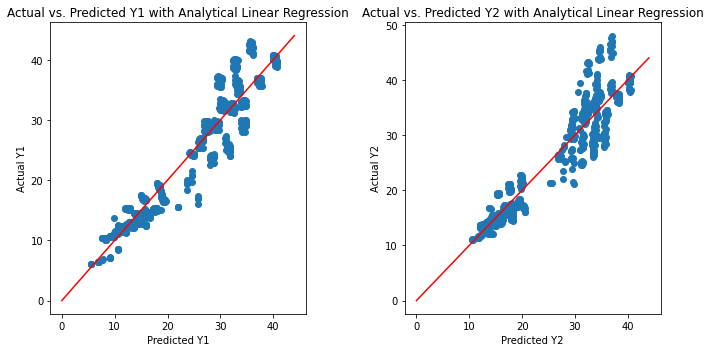

In [33]:
# create the model that will calculate linear regression for Y1 and Y2
model = LinearRegression()
batchSize = 128
optimizer = GradientDescent()
mini = model.fitMiniBatch(nfeatures, outputs, optimizer, batchSize)
print("mini: ", mini.w)

gd = model.fitGradientDescent(nfeatures, outputs, optimizer)
print("gd: ", gd.w)

# The linear regression function fit function takes in x and y 
# features is the matrix of datapoints that is not normalized
# outputs is the matrix of their actual values
answer = model.fit(nfeatures,outputs)


print("answer: ", answer.w)

def check (x1, y1, x2, y2,message="") : 
  # create two plots to show the predicted features: 
  figure, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

  # plot the actual vs. predicted for Y1
  axis1.scatter(x1, y1)
  axis1.set_xlabel('Predicted Y1')
  axis1.set_ylabel('Actual Y1')
  axis1.set_title("Actual vs. Predicted Y1 " + message)
  # line y = x
  axis1.plot(range(45), range(45), color='r')

  # plot the actual vs. predicted for Y2
  axis2.scatter(x2, y2)
  axis2.set_xlabel('Predicted Y2')
  axis2.set_ylabel('Actual Y2')
  axis2.set_title("Actual vs. Predicted Y2 " + message)
  # line y = x
  axis2.plot(range(45), range(45),color='r')

  plt.tight_layout()
  plt.show()

y1 = answer.predict(nfeatures)[:,0:1]
y2 = answer.predict(nfeatures)[:,1:2]

check(y1, outputs[:,0:1],y2, outputs[:,1:2],"with Analytical Linear Regression")


# Notes for displaying results
# choose the best one feature - compute z score of the weights after regression to find the best feature ( or do a max on weights )
# Plot your line ( y = bias + wImp * xImp )

# split model into training and testing. You only train with training set. They you see which parameters give the best results
# use the test part of the data set to test the final results 




From the graph above, we can see that the actual and predicted values are very close to the line y = x, which means the model is working. We can now perform analysis on the analyitcal linear regression model. 

## Analysis of Gradient Descent

We can now test the gradient descent methods on the data to make sure they are working

TODO: Proper traingin and testing with training and split data
TODO: Proper visualizations for viewing outputs of the model: 

- Calculate the cost of the model for differnt training splits? 
- Plot the model with the most important feature
- Plot the actual vs. expected on the unseen data


Weights for Y1:  [[-0.63999888]
 [-1.13065486]
 [ 2.57352582]
 [-2.34544906]
 [ 5.33819557]
 [-0.02608279]
 [ 2.65326765]
 [ 0.31628125]
 [22.30618661]]
Weights for Y2:  [[-0.77742292]
 [-1.12833388]
 [ 2.08196964]
 [-2.10578497]
 [ 5.35685554]
 [ 0.13584663]
 [ 1.95897259]
 [ 0.06343453]
 [24.58664859]]
[[-0.63999888 -0.77742292]
 [-1.13065486 -1.12833388]
 [ 2.57352582  2.08196964]
 [-2.34544906 -2.10578497]
 [ 5.33819557  5.35685554]
 [-0.02608279  0.13584663]
 [ 2.65326765  1.95897259]
 [ 0.31628125  0.06343453]
 [22.30618661 24.58664859]]


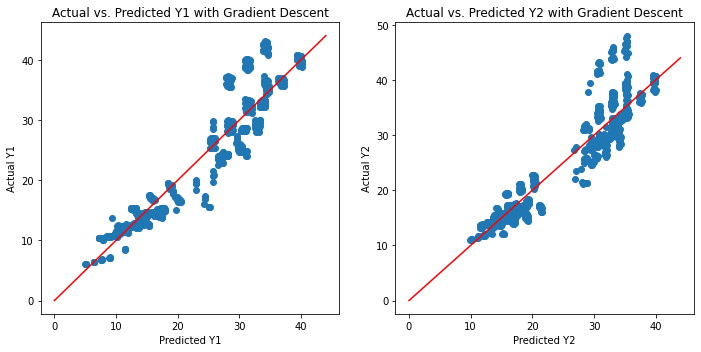

In [34]:
# perform gradient descent to predict Y1
optimizer = GradientDescent()
model2 = LinearRegression()
answery1 = model2.fitGradientDescent(nfeatures, outputs[:,0:1], optimizer)

# perform gradient descent to predict Y2
optimizer2 = GradientDescent()
model3 = LinearRegression()
answery2 = model3.fitGradientDescent(nfeatures, outputs[:,1:2], optimizer2)

# calculate the predicted values
y1 = answery1.predict(nfeatures)
y2 = answery2.predict(nfeatures)

print("Weights for Y1: ", answery1.w)
print("Weights for Y2: ", answery2.w)

# check if  you can run gradient descent on both outputs at the same time
optimizer = GradientDescent()
model3 = LinearRegression()
answerBoth = model3.fitGradientDescent(nfeatures, outputs, optimizer)
print(answerBoth.w)

# check them with the plotting function
check(y1, outputs[:,0:1],y2,outputs[:,1:2], "with Gradient Descent")




## Testing the ADAM Gradient Descent

TODO: Test properly with training and test set. Could even go for validation set if we wanted to

Hyper parameter tuning: plot cost of function on results for different hyperparameter values and use that to pick the best ones



Weights for Y1:  [[ 0.48382702]
 [-0.70488562]
 [ 2.96716607]
 [-1.45001968]
 [ 5.69931299]
 [ 0.04855838]
 [ 2.68815406]
 [ 0.24297461]
 [22.29086897]]
Weights for Y2:  [[ 5.60062849e-01]
 [-7.44121432e-01]
 [ 2.57562958e+00]
 [-9.41409911e-01]
 [ 5.34183831e+00]
 [ 2.23193976e-01]
 [ 1.96524611e+00]
 [ 1.11660184e-02]
 [ 2.43262321e+01]]


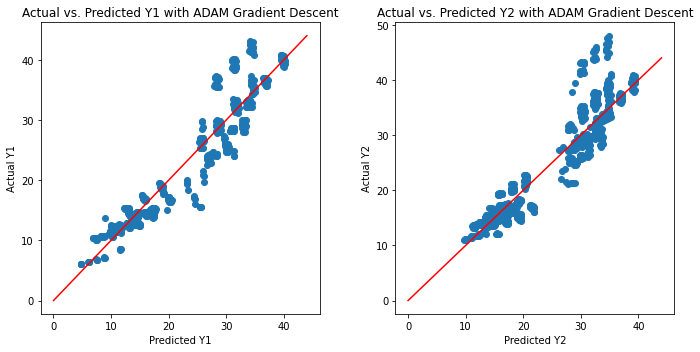

In [35]:
# perform ADAM gradient descent to predict Y1
optimizer = GradientDescent(learning_rate=0.0365, max_iters=1e4, epsilon=1e-8, beta1=0.5, beta2=0.5, record_history=False, epsilon2=1e-8)
model2 = LinearRegression()
answery1 = model2.fitADAM(nfeatures, outputs[:,0:1], optimizer, batch_size=5)

# perform ADAM gradient descent to predict Y2
model3 = LinearRegression()
answery2 = model3.fitADAM(nfeatures, outputs[:,1:2], optimizer,batch_size=5)

# calculate the predicted values
y1 = answery1.predict(nfeatures)
y2 = answery2.predict(nfeatures)

print("Weights for Y1: ", answery1.w)
print("Weights for Y2: ", answery2.w)


# check them with the plotting function
check(y1, outputs[:,0:1],y2,outputs[:,1:2], "with ADAM Gradient Descent")

# **TASK 2.2** Logistic Regression
Implementation of the Logistic Regression model using gradient descent and mini-batch stochastic gradient descent

TODO: Clean up and potentially refactor code so it uses gradient descent class?
TODO: Break up into smaller cells with more documentation? Not sure 
TODO: Implement mini batch? 


In [36]:
# logistic function
def logistic(z):
    return 1. / (1 + np.exp(-z))


class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=0.01, max_iters=1e4, epsilon=1e-5, record_history=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon  # represents termination condition (smallest objective change)
        self.max_iters = max_iters  # maximum number of iterations of gradient descent
        self.record_history = record_history
        self.num_epochs = 0
        if record_history:
            # record weight history for visualization
            self.w_history = []

    # uses simple GD
    # Formats: 
    # x - N * D matrix 
    # y - N * 1 matrix
    def fit(self, x, y, _lambda=0):
        # add a dimension to make x a matrix
        if x.ndim == 1:
            x = x[:, None]
        
        # add bias if requested
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])

        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0

        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y, _lambda)
            self.w = self.w - self.learning_rate * g
            t += 1
        
        return self

    # uses mini-batch SGD
    # Formats: 
    # x - N * D matrix 
    # y - N * 1 matrix
    def fitMB(self, x, y, batch_size, _lambda=0):
        # add a dimension to make x a matrix
        if x.ndim == 1:
            x = x[:, None]
        
        # add bias if requested
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])

        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0

        # calls mini-batch code
        self.w = self.runMiniBatchLogistic(x, y, batch_size)
        
        return self

    # predict the output for a given input
    def predict(self, x):
        # add a dimension to make x a matrix
        if x.ndim == 1:
            x = x[:, None]
        N_t = x.shape[0] # N

        # add bias if requested
        if self.add_bias:
            x = np.column_stack([x, np.ones(N_t)])
        
        # compute output using weight vector
        yh = logistic(np.dot(x, self.w))
        return yh

    # gradient function of the logistic function
    def gradient(self, x, y, _lambda=0):
        N,D = x.shape

        # x = N * D | w = D * 1 => x (.) w = N * 1
        # predictions from logistic function - size N
        yh = logistic(np.dot(x, self.w))
 
        # x = N * D matrix | yh = N * 1 matrix | y = N * 1 matrix 
        # !! (yh - y) does not throw an error if it does not work
        # (yh - y) = N * 1 | x = N * D, but it needs to be D * N 
        # do x.T. The gradient result is now (D * N ) . (N * 1 ) = D * 1
        grad = 0.5 * np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points

        #L1 regularization
        grad[:D] += _lambda * np.sign(self.w[:D])

        return grad                         # size D
    
    # Create mini-batch indices 
    def createMiniBatchIndex(self, N, batchSize):
        miniBatches = []
        index = list(range(N))  # Create a list of indices from 0 to N-1
        np.random.shuffle(index)  # Randomize the order of the indices
        numberOfMiniBatches = N // batchSize  # Number of complete mini batches
        for i in range(numberOfMiniBatches):
            miniBatches.append(index[i * batchSize:(i + 1) * batchSize])
        if N % batchSize != 0:  # If there are remaining data points
            # Add the remaining data points to the last mini batch
            miniBatches.append(index[numberOfMiniBatches * batchSize:])
        return miniBatches

    # Run the mini-batch gradient descent algotithm
    def runMiniBatchLogistic(self, x, y, batch_size):
        N, D = x.shape
        grad = np.inf
        t = 0
        w = np.zeros(D)  # Initial weights
        # print("w: ", w.shape)
        # running = True
        # initialize epoch reached to True
        epochReached = True
        epoch_counter = -1  # first conditional is not an epoch
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            # if epoch has been reached, generate new set of batches of gradient
            if epochReached == True: 
                # minibatches is a list of lists of indicies. Each inner list has batch_size number of random indicies
                minibatches = self.createMiniBatchIndex(N, batch_size)
                epochReached = False
                epoch_counter += 1
            numberOfMiniBatches = (N//batch_size)
            # access the minibatch at the right index according to which iteration we are at
            minibatch = minibatches[t % numberOfMiniBatches]
            # counter to count how many items there are in a batch ( necessary because last batch could have extra items )
            counter = 0
            # initialize gradient to be set of 0 vectors
            grad = np.zeros(D)
            # loop over all indexes in the minibatch list
            for index in minibatch: 
                # get the data points
                xp = x[index]           
                yp = y[index]

                # add a dimension to xp for the multiplication
                # xp = D * 1
                xp = xp[:,None]
                
                # yp = scalar

                # predict the y value
                # (1 * D) * (D * 1) = scalar
                # ADDED LOGISTIC FUNCTION
                yh = logistic(xp.T @ w)

                # calculate the gradient. Add to it and take the average after
                # (D * 1) * scalar = D * 1
                grad += np.dot(xp,yh - yp.T)
                counter += 1

            # Take the average
            grad = grad / (counter)

        # adjust learning rate according to gradient
            w = w - self.learning_rate * grad
            if self.record_history:
                self.w_history.append(w)
            t += 1
            # if t is divisible by the number of batches, epoch has been reached
            if t != 0 and t % numberOfMiniBatches == 0 : 
                epochReached = True
        #   if np.linalg.norm(grad) <= self.epsilon or t >= self.max_iters:
        #     running = False
        #     break
        self.num_epochs = epoch_counter

        return w

## Testing Logistic Regression

Now we will test the model using the sample bank data:

TODO: test and compare with minibatch
TODO: uses error measurements like the confusion matrix and other calculations. Show results graphically

### Model performance analysis

Method to compare a predicted output with the corresponding test labels

Takes in as parameters:


*   y (list of output labels for test data, decoded/in qualitative form)
*   y_hat (list of predicted labels, matching format of y)

Outputs:


*   error %
*   list of indices (within test data) of errors, if there are any




In [37]:
# check the performance of the model
def analyze_model_performance(y, y_hat):
    # number of test instances
    N = np.size(y) 
    error = 0
    error_indices = []
    # increment error by 1 every time there is an error
    for instance in range(N):
        if y[instance] != y_hat[instance]:
            error += 1
            error_indices.append(instance)
    # divide by N to get percentage of error
    return error/float(N), error_indices

### Logistic Regression test function

Method that fits a LR model according to hyperparameters specified.

Takes in as parameters:

*   minibatch (boolean, True will fit model using mini-batch SGD, False will use simple gradient descent, default=False)
*   train_test_split (float between 0 and 1 representing the % of data used to train - the rest will be used to test, default=0.8)
*   l_rate (float, learning rate for GD, default = 0.1)
*   b_size (integer, batch size for mini-batch SGD, default=1)
*   verbose (boolean, True will print values listed below)

Outputs:

*   w (vector of model weights)
*   one_hot_encoded_bank_data (N * D+2 matrix)
*   y_hat (list of predicted output data)

Prints:

*   weight vector


In [38]:
import random as rand
# tool for one hot encoding
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

bank_data = pd.read_csv("Qualitative_Bankruptcy.data.txt", header=None)
# create the encoder and encode the data
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(bank_data)
print("Encoding categories:")
print(enc.categories_)  # shows the one-hot encoding format for the data

def test_logistic(minibatch=False, train_test_split=0.8, l_rate=0.1, b_size=1, lamb=0, training=False, epochs=False, verbose=True):
    # N * D matrix
    one_hot_encoded_bank_data = enc.transform(bank_data).toarray()
    # randomize the data - right now is random
    rand.shuffle(one_hot_encoded_bank_data)  # since data taken in is sorted by feature

    # print(one_hot_encoded_bank_data[0]) - gives a list of 20 features ( 6 * 3 for the features, 2 for the output features ( B or NB ))

    training_set_x, test_set_x, training_set_y, test_set_y, split_index = split_data(one_hot_encoded_bank_data, train_test_split)
    
    if minibatch == False:
        log_model = LogisticRegression(learning_rate=l_rate)
        # this also adds a bias to the logistic regression, since the bias is by default true
        log_model.fit(training_set_x, training_set_y, _lambda=lamb)
    else:
        log_model = LogisticRegression(learning_rate=l_rate)
        log_model.fitMB(training_set_x, training_set_y, b_size, _lambda=lamb)
    
    if training:
        y_hat = log_model.predict(training_set_x)
    else:
        y_hat = log_model.predict(test_set_x)

    if verbose:
        print("\nModel weight vector:")
        print(log_model.w)

        if training:
            test_y = decode_y(training_set_y)
        else:
            test_y = decode_y(test_set_y)
        y_hat_decoded = decode_y(y_hat)

        print("\nActual test data:")
        print(test_y)
        print("\nPredicted Test data:")
        print(y_hat_decoded)
        error_pct, error_indices = analyze_model_performance(test_y, y_hat_decoded)
        print(f'\nError percentage: {error_pct}')
        if error_pct > 0:
            print("Errors:")
            for index in error_indices:
                instance = enc.inverse_transform(one_hot_encoded_bank_data)[split_index + index]
                print(f'\tInstance {instance} should have output label {test_y[index]} but was assigned {y_hat_decoded[index]}')
    if epochs:
        return log_model.w, one_hot_encoded_bank_data, y_hat, log_model.num_epochs
    return log_model.w, one_hot_encoded_bank_data, y_hat

# splits one-hot encoded data
def split_data(data, split):
    # transpose x once to make it D * N, and take the first 18 rows ( all 6 features ). Transpose again to make it back into the model we want
    # x - finally is N * D
    x = np.transpose(np.transpose(data)[:18])

    # transpose y once, because they want y in as an array [1,2,3,4...]
    # we only to take one of the output features, we only a one dimensional ouptut with 2 possible qualitiative values.
    #  Col [18]: NB | Col [19]: B. Take Col 18 - one collum from a D * N matrix is a 1 * N matrix
    y = np.transpose(data)[18]

    split_index = int(x.shape[0] * split)
    training_set_x = x[:split_index]
    test_set_x = x[split_index:]
    training_set_y = y[:split_index]
    test_set_y = y[split_index:]

    return training_set_x, test_set_x, training_set_y, test_set_y, split_index

# decodes one-hot encoded output
def decode_y(y):
    return  ['NB' if instance < 0.5 else 'B' for instance in y]

Encoding categories:
[array(['A', 'N', 'P'], dtype=object), array(['A', 'N', 'P'], dtype=object), array(['A', 'N', 'P'], dtype=object), array(['A', 'N', 'P'], dtype=object), array(['A', 'N', 'P'], dtype=object), array(['A', 'N', 'P'], dtype=object), array(['B', 'NB'], dtype=object)]


####Testing Logistic Regression using gradient descent

In [39]:
w, data, y_hat = test_logistic(minibatch=False, train_test_split=0.8, l_rate=0.1, verbose=True)


Model weight vector:
[-4.86321456e-01  6.14587902e-01 -1.35528920e+00 -3.32993098e-01
 -1.85019274e-03 -8.92179466e-01 -1.27359510e+00  1.35350101e+00
 -1.30692866e+00 -7.80711342e-01  1.25765346e+00 -1.70396488e+00
 -1.71163039e+00  3.02831133e+00 -2.54370370e+00 -4.16189521e-01
 -2.92370931e-01 -5.18462305e-01 -1.22702276e+00]

Actual test data:
['NB', 'NB', 'NB', 'NB', 'NB', 'B', 'B', 'NB', 'B', 'NB', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'B', 'B', 'NB', 'B', 'B', 'B', 'NB', 'B', 'B', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'NB', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']

Predicted Test data:
['NB', 'NB', 'NB', 'NB', 'NB', 'B', 'B', 'NB', 'B', 'NB', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'B', 'B', 'NB', 'B', 'B', 'B', 'NB', 'B', 'B', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'NB', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']

Error percentage: 0.0


####Testing Logistic Regression using mini-batch SGD

In [40]:
w, data, y_hat = test_logistic(minibatch=True, train_test_split=0.8, l_rate=0.1, b_size=16, verbose=True)


Model weight vector:
[-0.46472429 -0.44547692 -0.53093821 -0.80853638  0.35722704 -0.98983007
 -1.68514061  1.82394641 -1.57994521 -1.50504473  1.99615214 -1.93224682
 -1.58972794  2.51872628 -2.37013775  0.12639885 -0.26768584 -1.29985243
 -1.44113941]

Actual test data:
['B', 'B', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'B', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'NB', 'NB', 'NB']

Predicted Test data:
['B', 'B', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'B', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'NB', 'NB', 'B', 'B', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'NB', 'NB', 'NB']

Error percentage: 0.0


###Cost Function

In [41]:
def cost_fn(y, y_hat):
    J = np.mean(y * np.log1p(np.exp(-y_hat)) + (1-y) * np.log1p(np.exp(y_hat)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

### Plotting Logistic Regression

Plot of logistic regression results on a random run. Random jitter applied to aid with visualization.

*   x-axis: strongest feature (competitiveness, X5)
*   y-axis: logistic probability



In [42]:
def plot_logistic(minibatch=False, split=0.8, learning_rate=0.1, batch_size=5, verbose=False):
    w, data, y_hat = test_logistic(minibatch=minibatch, train_test_split=split, l_rate=learning_rate, b_size=batch_size, verbose=verbose)
    training_set_x, test_set_x, training_set_y, test_set_y, split_index = split_data(data, split)

    # plots
    # x5 seems to be the most important feature, so we will plot it against y
    x5 = np.transpose(test_set_x)[12:15]
    x5_quali = []
    for index in range(x5.shape[1]):
        x5_val = 0
        if x5[0, index] == 1:
            x5_val = 'Average'
        elif x5[1, index] == 1:
            x5_val = 'Negative'
        elif x5[2, index] == 1:
            x5_val = 'Positive'
        else:
            print("error in data")
        x5_quali.append(x5_val)

    #sorting for correct plotting order (Negative, Average, Positive)
    index = 1
    while x5_quali[0] != 'Negative' and index < len(x5_quali):
        temp = x5_quali[0]
        x5_quali[0] = x5_quali[index]
        x5_quali[index] = temp
        temp = y_hat[0]
        y_hat[0] = y_hat[index]
        y_hat[index] = temp
        index += 1
    
    while x5_quali[1] != 'Average' and index < len(x5_quali):
        temp = x5_quali[1]
        x5_quali[1] = x5_quali[index]
        x5_quali[index] = temp
        temp = y_hat[1]
        y_hat[1] = y_hat[index]
        y_hat[index] = temp
        index += 1
    
    # y^ values are heavily overlapping
    # as such, I am adding jitter (random noise) to improve visualization
    y_hat_jittered = []
    for point in y_hat:
        if point > 0.5:
            y_hat_jittered.append(point - 0.1 * rand.random())
        else:
            y_hat_jittered.append(point + 0.1 * rand.random())

    plt.plot(x5_quali, y_hat_jittered, '.', alpha=.5, label='test data', color = 'c')
    plt.axhline(y=0.5, color='m', label='decision boundary')
    plt.xlabel('Competitiveness (X5)')
    plt.ylabel('Probaility of Bankruptcy $(y = \sigma(w^Tx))$')
    plt.title('Probability of Bankruptcy vs. Competitiveness')
    plt.legend()
    plt.show()

####Plotting Logistic with GD

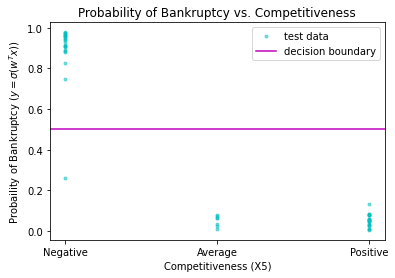

In [43]:
plot_logistic(minibatch=False, split=0.8, learning_rate=0.1)

####Plotting Logistic with mini-batch SGD

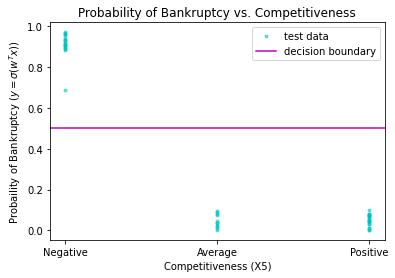

In [44]:
plot_logistic(minibatch=True, split=0.8, learning_rate=0.1, batch_size=16)

### Confusion Matrix and Performance Metrics

In [74]:
def compute_performance(minibatch=False, split=0.8, learning_rate=0.1, batch_size=5, verbose=False):
    w, data, y_hat = test_logistic(minibatch=False, train_test_split=split, l_rate=learning_rate, b_size=batch_size, verbose=verbose)
    training_set_x, test_set_x, training_set_y, test_set_y, split_index = split_data(data, split)
    test_y = decode_y(test_set_y)
    y_hat_decoded = decode_y(y_hat)
    
    # confusion matrix
    tp = sum([1 if test_y[index] == 'B' and y_hat_decoded[index] == 'B' else 0 for index, label in enumerate(test_y)])
    fp = sum([1 if test_y[index] == 'NB' and y_hat_decoded[index] == 'B' else 0 for index, label in enumerate(test_y)])
    fn = sum([1 if test_y[index] == 'B' and y_hat_decoded[index] == 'NB' else 0 for index, label in enumerate(test_y)])
    tn = sum([1 if test_y[index] == 'NB' and y_hat_decoded[index] == 'NB' else 0 for index, label in enumerate(test_y)])

    confusion = [[tp, fp], [fn, tn]]
    df_confusion = pd.DataFrame(confusion, columns=['B', 'NB'], index=['B', 'NB'])
    # plt.figure(figsize=(10,7))
    sns.heatmap(df_confusion, annot=True,cmap='viridis')
    plt.xlabel('Truth')
    plt.ylabel('Result')
    plt.title('Confusion Matrix for Logistic Regression')
    plt.show()

    # performance metrics
    p = tp + fn
    n = fp + tn
    rp = tp + fp
    rn = fn + tn
    precision = (tp + tn) / (p + n)
    recall = tp / p
    print(f'\nAccuracy: {(tp + tn) / (p + n)}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 score: {2 * precision * recall / (precision + recall)}')
    print(f'Miss rate: {fn / p}')
    print(f'Fallout: {fp / n}')

####Confusion matrix & Performance Metrics for Logistic with GD

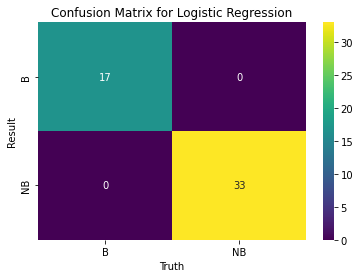


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Miss rate: 0.0
Fallout: 0.0


In [77]:
compute_performance(minibatch=False, split=0.8, learning_rate=0.1)

####Confusion matrix & Performance Metrics for Logistic with with mini-batch SGD

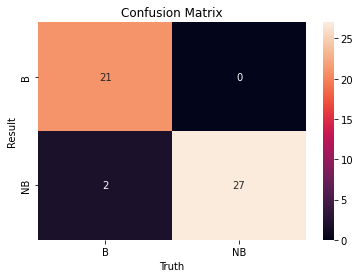


Accuracy: 0.96
Precision: 0.96
Recall: 0.9130434782608695
F1 score: 0.935933147632312
Miss rate: 0.08695652173913043
Fallout: 0.0


In [47]:
compute_performance(minibatch=True, split=0.8, learning_rate=0.1, batch_size=16)

#Task 3 Run Experiments

##Task 3.1 Report the performance of linear regression and fully batched logistic regression


###Performance on training set

Average of 15 runs

In [48]:
n = 15
cost = []
for i in range(n):
    w, data, y_hat = test_logistic(minibatch=False, train_test_split=0.8, l_rate=0.1, training=True, verbose=False)
    training_set_x, test_set_x, training_set_y, test_set_y, split_index = split_data(data, 0.8)
    cost.append(cost_fn(training_set_y, y_hat))
print(f"Average cost of Logistic Regression (training set, {n} runs): {np.mean(cost)}")

Average cost of Logistic Regression (training set, 15 runs): 0.6759094207614401


###Performance on test set

Average of 15 runs

In [49]:
n = 15
cost = []
for i in range(n):
    w, data, y_hat = test_logistic(minibatch=False, train_test_split=0.8, l_rate=0.1, training=False, verbose=False)
    training_set_x, test_set_x, training_set_y, test_set_y, split_index = split_data(data, 0.8)
    cost.append(cost_fn(test_set_y, y_hat))
print(f"Average cost of Logistic Regression (test set, {n} runs): {np.mean(cost)}")

Average cost of Logistic Regression (test set, 15 runs): 0.5753277123992359


##Task 3.2 Report the weights of each of features in your trained models

###Feature weights for fully batched logistic regression

Average of 15 runs

In [50]:
n = 15
weights = []
feature_names = ['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk']
attributes = ['Average', 'Negative', 'Positive']
for i in range(n):
    w, data, y_hat = test_logistic(minibatch=False, train_test_split=0.8, l_rate=0.1, training=True, verbose=False)
    weights.append(w)
avg_weights = np.mean(weights, axis=0)
print(f"Average weights of Logistic Regression (fully batched, {n} runs):")
for index, feature in enumerate(avg_weights):
    if index == 18:
        print(f'\tBias: {feature}')
    else:
        print(f'\t{feature_names[index // 3]} - {attributes[index % 3]}: {feature}')

Average weights of Logistic Regression (fully batched, 15 runs):
	Industrial Risk - Average: -0.8154394097052113
	Industrial Risk - Negative: 0.1664122486429069
	Industrial Risk - Positive: -0.6402098867079539
	Management Risk - Average: -0.6488646045858713
	Management Risk - Negative: 0.13763810222003162
	Management Risk - Positive: -0.7780105454044197
	Financial Flexibility - Average: -1.4068131016802334
	Financial Flexibility - Negative: 1.5354925148298597
	Financial Flexibility - Positive: -1.4179164609198887
	Credibility - Average: -1.1106110013970893
	Credibility - Negative: 1.5160553634861256
	Credibility - Positive: -1.6946814098592924
	Competitiveness - Average: -1.5403559308750163
	Competitiveness - Negative: 2.6391809186688544
	Competitiveness - Positive: -2.388062035564091
	Operating Risk - Average: -0.18767454984046772
	Operating Risk - Negative: -0.12189418516947208
	Operating Risk - Positive: -0.9796683127603192
	Bias: -1.2892370477702573


###Feature weights for mini-batch logistic regression

Average of 10 runs

In [51]:
n = 10
batch_size = 16
weights = []
feature_names = ['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk']
attributes = ['Average', 'Negative', 'Positive']
for i in range(n):
    w, data, y_hat = test_logistic(minibatch=True, train_test_split=0.8, l_rate=0.1, b_size=batch_size, training=True, verbose=False)
    weights.append(w)
avg_weights = np.mean(weights, axis=0)
print(f"Average weights of Logistic Regression (mini-batch - batch size {batch_size}, {n} runs):")
for index, feature in enumerate(avg_weights):
    if index == 18:
        print(f'\tBias: {feature}')
    else:
        print(f'\t{feature_names[index // 3]} - {attributes[index % 3]}: {feature}')

Average weights of Logistic Regression (mini-batch - batch size 16, 10 runs):
	Industrial Risk - Average: -0.8963090039663573
	Industrial Risk - Negative: 0.12795746075068476
	Industrial Risk - Positive: -0.6155011283757043
	Management Risk - Average: -0.915131054525151
	Management Risk - Negative: 0.18601601805395532
	Management Risk - Positive: -0.6547376351201818
	Financial Flexibility - Average: -1.530516340351744
	Financial Flexibility - Negative: 1.8347761667932967
	Financial Flexibility - Positive: -1.6881124980329272
	Credibility - Average: -1.153344569805662
	Credibility - Negative: 1.8009504699791017
	Credibility - Positive: -2.031458571764813
	Competitiveness - Average: -1.6503836017965583
	Competitiveness - Negative: 3.175783832704146
	Competitiveness - Positive: -2.9092529024989693
	Operating Risk - Average: -0.2335910340302499
	Operating Risk - Negative: -0.07883263444138698
	Operating Risk - Positive: -1.0714290031197415
	Bias: -1.3838526715913773


##Task 3.3 Sample growing subsets of the training data

###Growing subsets for fully batched logistic regression

####Plot of subset size vs. cost of training/test set

Mean cost of 10 runs per subset size

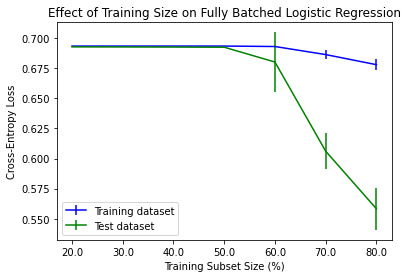

In [52]:
n = 10
splits = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
split_cost_train = []
std_train = []
split_cost_test = []
std_test = []
for split in splits:
    cost_train = []
    cost_test = []
    for i in range(n):
        w, data, y_hat = test_logistic(minibatch=False, train_test_split=split, l_rate=0.1, training=True, verbose=False)
        training_set_x, test_set_x, training_set_y, test_set_y, split_index = split_data(data, split)
        cost_train.append(cost_fn(training_set_y, y_hat))
        w, data, y_hat = test_logistic(minibatch=False, train_test_split=split, l_rate=0.1, training=False, verbose=False)
        training_set_x, test_set_x, training_set_y, test_set_y, split_index = split_data(data, split)
        cost_test.append(cost_fn(test_set_y, y_hat))
    split_cost_train.append(np.mean(cost_train))
    split_cost_test.append(np.mean(cost_test))
    std_train.append(np.std(cost_train))
    std_test.append(np.std(cost_test))
splits = [str(split * 100) for split in splits]
plt.errorbar(splits, split_cost_train, std_train, label='Training dataset', color='b')
plt.errorbar(splits, split_cost_test, std_test, label='Test dataset', color='g')
plt.xlabel('Training Subset Size (%)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Effect of Training Size on Fully Batched Logistic Regression')
plt.legend()
plt.show()

###Growing subsets for mini-batch logistic regression

####Plot of subset size vs. cost of training/test set

Mean cost of 5 runs per subset size

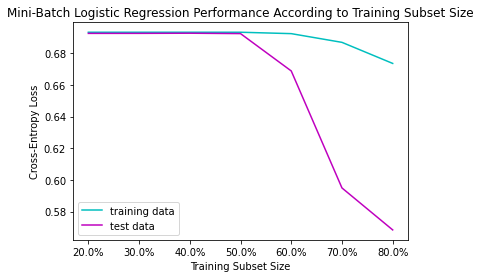

In [53]:
n = 5
batch_size = 16
splits = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
split_cost_train = []
split_cost_test = []
for split in splits:
    cost_train = []
    cost_test = []
    for i in range(n):
        w, data, y_hat = test_logistic(minibatch=True, train_test_split=split, l_rate=0.1, b_size=batch_size, training=True, verbose=False)
        training_set_x, test_set_x, training_set_y, test_set_y, split_index = split_data(data, split)
        cost_train.append(cost_fn(training_set_y, y_hat))
        w, data, y_hat = test_logistic(minibatch=False, train_test_split=split, l_rate=0.1, b_size=batch_size, training=False, verbose=False)
        training_set_x, test_set_x, training_set_y, test_set_y, split_index = split_data(data, split)
        cost_test.append(cost_fn(test_set_y, y_hat))
    split_cost_train.append(np.mean(cost_train))
    split_cost_test.append(np.mean(cost_test))
splits = [str(split * 100) + "%" for split in splits]
plt.plot(splits, split_cost_train, 'g', label='training data', color='c')
plt.plot(splits, split_cost_test, 'g', label='test data', color='m')
plt.xlabel('Training Subset Size')
plt.ylabel('Cross-Entropy Loss')
plt.title("Mini-Batch Logistic Regression Performance According to Training Subset Size")
plt.legend()
plt.show()

##Task 3.4 Try out growing minibatch sizes

###Mini-batch logistic regression performance & convergence speed

####Plot of batch size vs. cost of test set

Mean cost of 5 runs per batch size

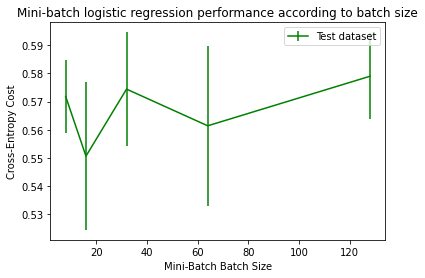

In [54]:
n = 5
batch_sizes = [2 ** i for i in range(3, 8)]
std_cost = []
std_time = []
batch_cost = []
batch_time = []
for batch_size in batch_sizes:
    cost = []
    t = []
    for i in range(n):
        w, data, y_hat, eps = test_logistic(minibatch=True, train_test_split=0.8, l_rate=0.1, b_size=batch_size, training=False, verbose=False, epochs=True)
        training_set_x, test_set_x, training_set_y, test_set_y, split_index = split_data(data, 0.8)
        cost.append(cost_fn(test_set_y, y_hat))
        t.append(eps)
    batch_cost.append(np.mean(cost))
    batch_time.append(np.mean(t))
    std_cost.append(np.std(cost))
    std_time.append(np.std(t))
plt.errorbar(batch_sizes, batch_cost, yerr=std_cost, label='Test dataset', color='g')
plt.xlabel('Mini-Batch Batch Size')
plt.ylabel('Cross-Entropy Cost')
plt.title('Mini-batch logistic regression performance according to batch size')
plt.legend()
plt.show()

####Plot of batch size vs. convergence speed of model

Mean convergence speed of 5 runs per batch size

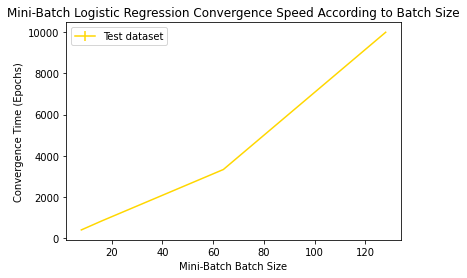

In [57]:
plt.errorbar(batch_sizes, batch_time, yerr=std_time, label='Test dataset', color='gold')
plt.xlabel('Mini-Batch Batch Size')
plt.ylabel('Convergence Time (Epochs)')
plt.title('Mini-Batch Logistic Regression Convergence Speed According to Batch Size')
plt.legend()
plt.show()

##Task 3.5 Present the performance of both linear and logistic regression with at least three different learning rates

###Performance of fully batched logistic regression with various learning rates

Learning rates: between 0.1 and 0.9 with a step size of 0.1

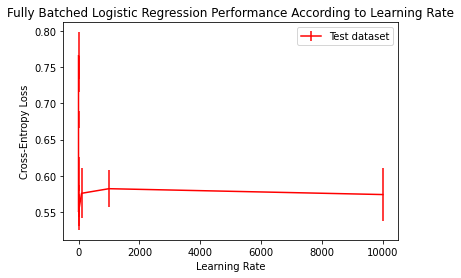

In [58]:
n = 25
learning_rates = [10 ** i for i in range(-5, 5)]
std = []
rate_cost = []
for learning_rate in learning_rates:
    cost = []
    for i in range(n):
        w, data, y_hat = test_logistic(minibatch=False, train_test_split=0.8, l_rate=learning_rate,  training=False, verbose=False)
        training_set_x, test_set_x, training_set_y, test_set_y, split_index = split_data(data, split)
        cost.append(cost_fn(test_set_y, y_hat))
    rate_cost.append(np.mean(cost))
    std.append(np.std(cost))
plt.errorbar(learning_rates, rate_cost, yerr=std, label='Test dataset', color='r')
plt.xlabel('Learning Rate')
plt.ylabel('Cross-Entropy Loss')
plt.title('Fully Batched Logistic Regression Performance According to Learning Rate')
plt.legend()
plt.show()